In [1]:
#One time run to import the project to your drive
!git clone https://github.com/KodeWil/final_project_AI_csv_Data.git

Cloning into 'final_project_AI_csv_Data'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (209/209), done.
remote: Total 211 (delta 2), reused 211 (delta 2), pack-reused 0
Receiving objects: 100% (211/211), 17.32 MiB | 16.74 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [0]:
def addData(files: str) -> list:
    allCsv = []
    for file in files:
      temp = open(file)
      tempDf = pd.read_csv(file)
      allCsv.append(tempDf)
    return allCsv


In [3]:
import pandas as pd 
import glob 
frames = []

#Create a list ('frames') with four nested lists, one per sensor. 
#Each nested list have all the samples (DF) for that sensor.
%cd /content/final_project_AI_csv_Data/phone/accel
files = glob.glob('*.csv')
files.sort()
frames.append(addData(files))
%cd /content/final_project_AI_csv_Data/phone/gyro
files = glob.glob('*.csv')
files.sort()
frames.append(addData(files))
%cd /content/final_project_AI_csv_Data/watch/accel
files = glob.glob('*.csv')
files.sort()
frames.append(addData(files))
%cd /content/final_project_AI_csv_Data/watch/gyro
files = glob.glob('*.csv')
files.sort()
frames.append(addData(files))
print(len(frames))
# 0 in frames = /phone/accel
# 1 in frames = /phone/gyro
# 2 in frames = /watch/accel
# 3 in frames = /watch/gyro

/content/final_project_AI_csv_Data/phone/accel
/content/final_project_AI_csv_Data/phone/gyro
/content/final_project_AI_csv_Data/watch/accel
/content/final_project_AI_csv_Data/watch/gyro
4


In [0]:
def colorMap(difClass: list) -> list: #Funcion to color map the classes.
    cMap = ["#ff3333", "#ff7b33", "#ffc933", "#89ff33", "#33ff49", 
           "#33fff2", "#33aaff", "#335cff", "#5133ff", "#a333ff",
           "#f133ff", "#e483b1", "#979797", "#752f7e", "#6d067b",
           "#ff4dc7", "#c900bd", "#63002c"]
    cList = []
    for i, values in enumerate(difClass):
      color = cMap[difClass[i]]
      cList.append(color)
    return cList

In [5]:
# preparamos los datos para el clustering
d_accel = frames[0][1]
#d_accel = datos_accel
print(d_accel.shape)

(407, 93)


In [0]:
#Directly related features are wrapped in intervals on a list
def selectFeatures(features) -> list:
  labels = copy.deepcopy(features)
  intervals = []
  intervals.append(labels[2:31]) 
  intervals.append(labels[32:34]) # {X,Y,Z}AVG 
  intervals.append(labels[35:37]) # {X,Y,Z}PEAK 
  intervals.append(labels[38:40]) # {X,Y,Z}ABSOLDEV 
  intervals.append(labels[41:43]) # {X,Y,Z}STANDDEV 
  intervals.append(labels[44:46]) # {X,Y,Z}VAR* 
  intervals.append(labels[47:85]) # FCC
  intervals.append(labels[86:88]) # COS
  intervals.append(labels[89:91]) # COR
  intervals.append(labels[92:92]) # resultant
  return intervals


In [0]:
def allPca(X):
  pca = PCA(n_components=2,whiten=False).fit(X)
  # print(pca.explained_variance_ratio_)
  # print(pca.singular_values_)
  transformados = pca.fit_transform(X)
  # print(transformados.shape)
  allPlot(transformados)

In [0]:
def allIca(X):
  ica = FastICA(n_components=2,whiten=False).fit(X)
  # print(pca.explained_variance_ratio_)
  # print(pca.singular_values_)
  transformados = ica.fit_transform(X)
  # print(transformados.shape)
  allPlot(transformados)

In [0]:
def allPlot(transformados):
  x = transformados[:,0]
  y = transformados[:,1]
  c = ground_truth
  # c = colorMap(c)
  fig, ax = plt.subplots(figsize=[10,10])
  scatter = ax.scatter(x, y, c = c)
  # produce a legend with the unique colors from the scatter
  legend1 = ax.legend(*scatter.legend_elements(),
                      loc = 1, title="Classes")
  ax.add_artist(legend1)

  plt.show()

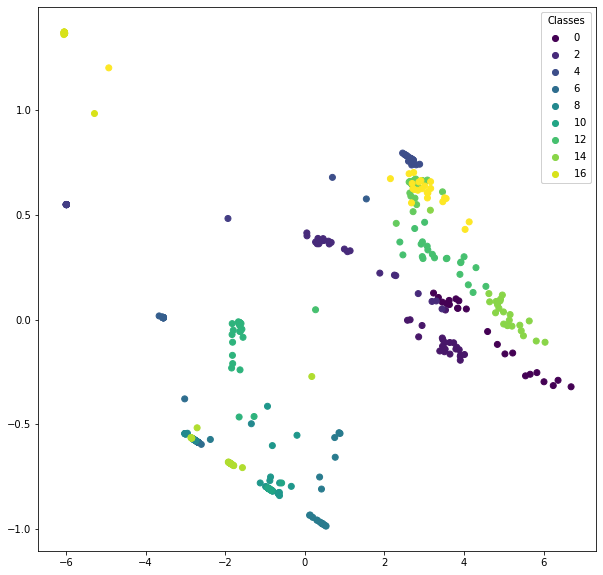

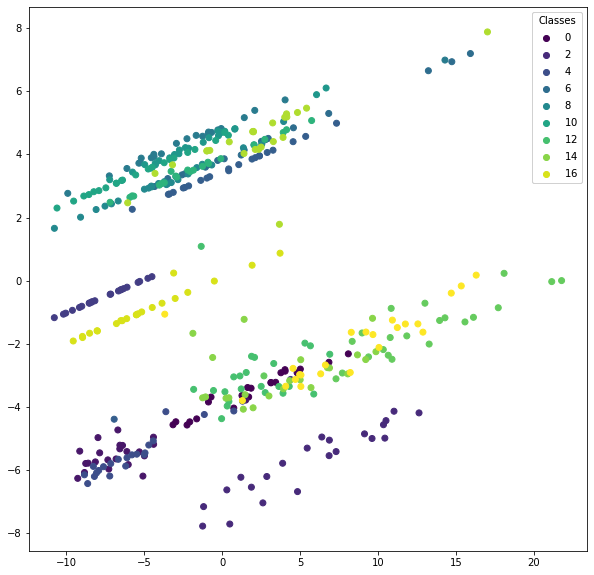

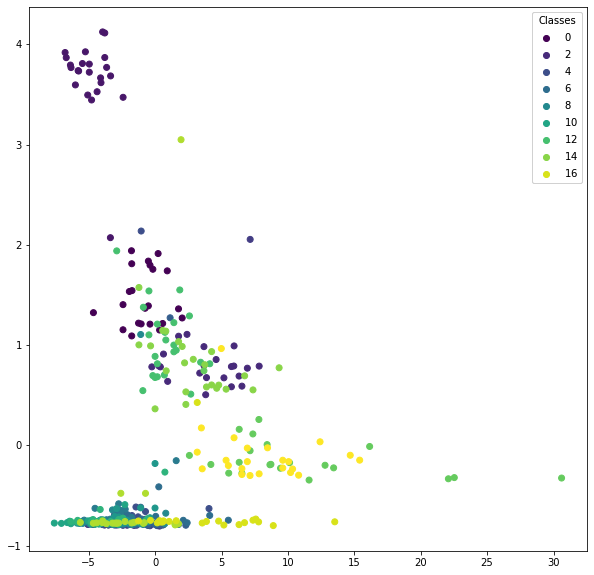

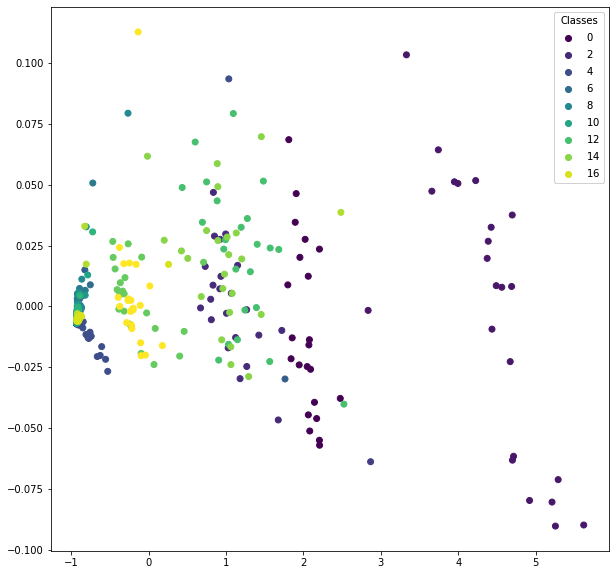

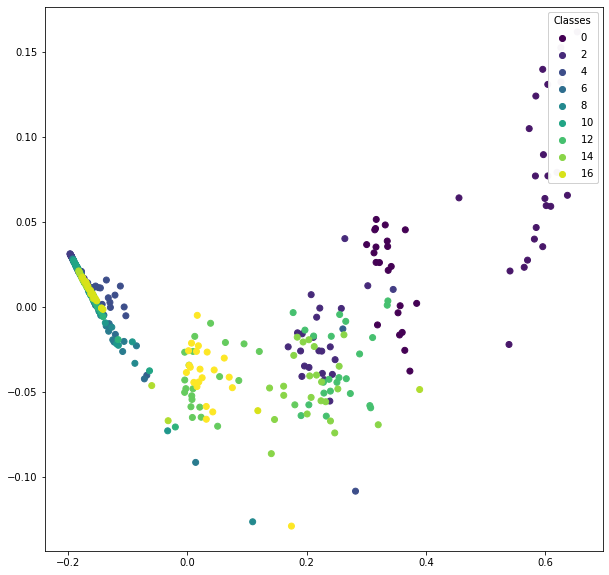

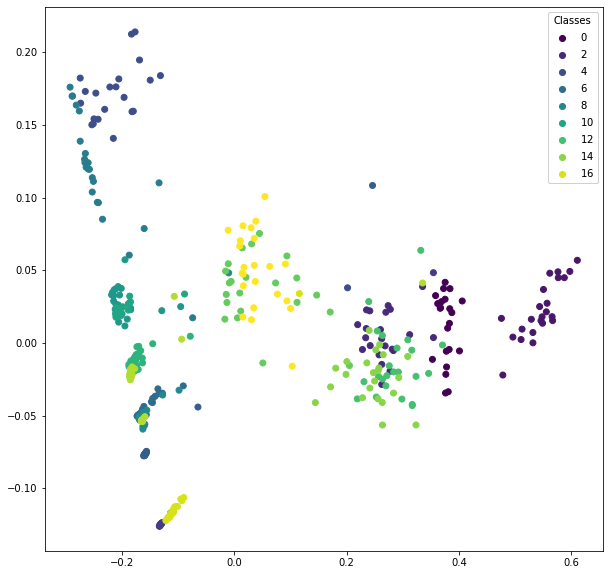

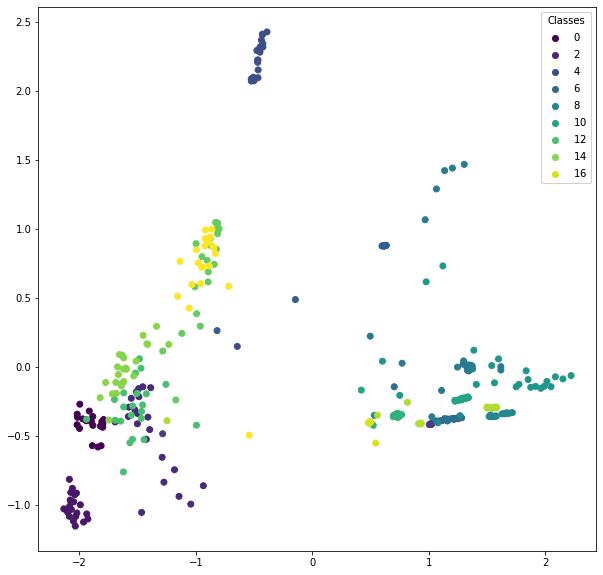

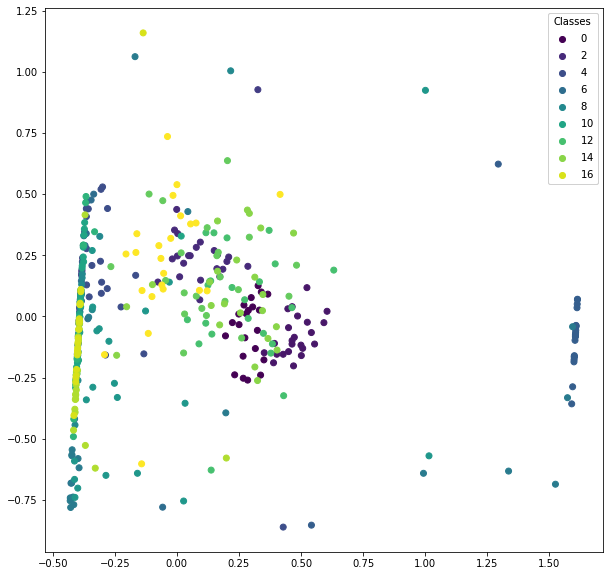

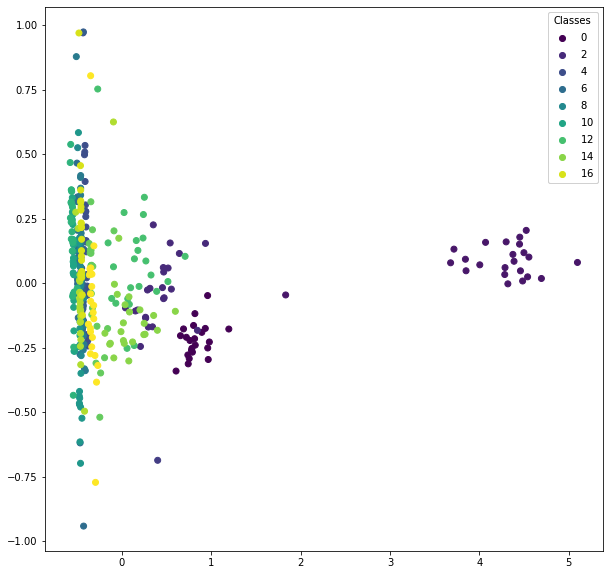

In [9]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
import copy
ground_truth = d_accel[["ACTIVITY"]].values
lookupTable, ground_truth = np.unique(ground_truth, return_inverse=True)
columnas = list(d_accel.columns[1:92])
wrapInf = selectFeatures(columnas)

#PCA
for piece in wrapInf:
  X = d_accel[piece].values
  if(len(piece) > 0):
    allPca(X)

#ICA
for piece in wrapInf:
  X = d_accel[piece].values
  if(len(piece) > 0):
    allIca(X)